In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
w_init = 0.5
n = 300
m = 90
iters = 50
alpha = 0.3 * m
eta = alpha / m

In [64]:
w = w_init * np.random.randn(n) / np.sqrt(n)
w_history = np.zeros((iters + 1, n))
w_history[0] = w

for iter in range(1, iters + 1):
    phi_w = np.copy(w)
    phi_w[phi_w < 0] = 0
    phi_w_mask = np.copy(phi_w)
    phi_w_mask[m:] = 0
    sq_norm = np.dot(w, w)
    sq_norm_phi = np.dot(phi_w_mask, phi_w_mask)

    w += eta * (phi_w_mask * (2 - sq_norm) - w * sq_norm_phi)
    w_history[iter] = w

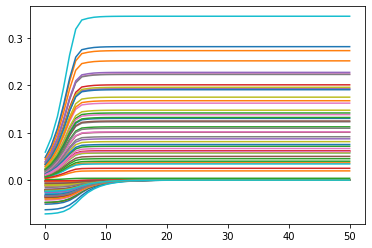

0.06701379694620205 0.3459080380171947


In [65]:
for i in range(m):
    plt.plot(np.arange(iters + 1), w_history[:, i])
plt.show()

print(np.max(w_history[0]), np.max(w_history[iters]))


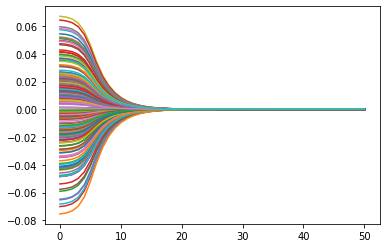

In [66]:
for i in range(m, n):
    plt.plot(np.arange(iters + 1), w_history[:, i])
plt.show()

In [67]:
X = np.copy(w_history)
S = np.nonzero(w_history[0, :m] > 0)[0]
S_comp = np.array([i for i in range(n) if i not in S])
norm = np.sum(np.square(X), axis=1)
Phi_1 = np.sum(np.square(X[:, S]), axis=1)
Phi_2 = np.sum(np.square(X[:, S_comp]), axis=1)

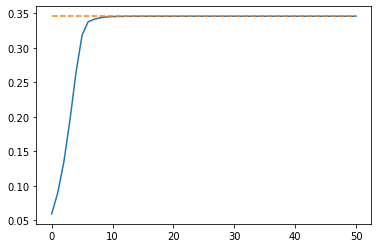

In [68]:
i = np.argmax(w_history[0, :m])
bound = w_history[0, i] / np.sqrt(Phi_1[0])
plt.plot(np.arange(iters + 1), w_history[:, i])
plt.plot(np.arange(iters + 1), bound * np.ones(iters + 1), linestyle='dashed')
plt.show()

[]

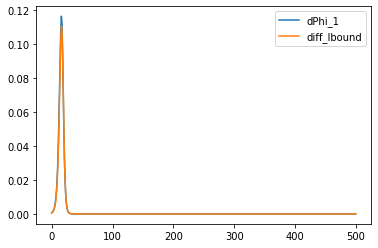

In [72]:
dPhi_1 = np.diff(Phi_1)
diff_lbound = 4 * eta * Phi_1 * (1 - Phi_1)
plt.plot(np.arange(iters), dPhi_1, label="dPhi_1")
plt.plot(np.arange(iters + 1), diff_lbound, label="diff_lbound")
plt.legend()
plt.plot()

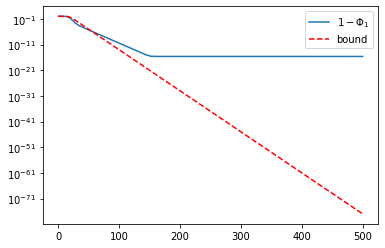

In [73]:
bound = np.zeros(iters + 1)
c0 = Phi_1[0] / (1 - Phi_1[0])

for i in range(0, iters + 1):
    bound[i] = 1 / (1 + np.power(1 + 4 * eta, i) * c0)

# plt.plot(np.arange(iters + 1), norm, label="norm")

plt.plot(np.arange(iters + 1), 1 - Phi_1 + 0.4 * Phi_2, label=r"$1 - \Phi_1$")
plt.plot(np.arange(iters + 1), bound, 'r--', label="bound")
plt.yscale('log')
# plt.plot(np.arange(iters + 1), Phi_2, label=r"$\Phi_2$")
plt.legend()
plt.show()

In [74]:
final = w_history[iters]
init = w_history[0]
exp = 2 * eta / np.log(1 + 4 * eta)
print(exp)
final_bound = init / np.power(Phi_1[0], exp)

sharp_bound = init
for i in range(len(bound)):
    sharp_bound = sharp_bound * (1 + 2 * eta * bound[i])

print(final[S[:5]])
print(sharp_bound[S[:5]])
print(final_bound[S[:5]])

0.6043166907231295
[0.36167815 0.11346861 0.06479692 0.32659892 0.0008153 ]
[0.57300303 0.17976717 0.1026571  0.51742736 0.00129167]
[0.72583605 0.22771518 0.13003809 0.65543707 0.00163619]


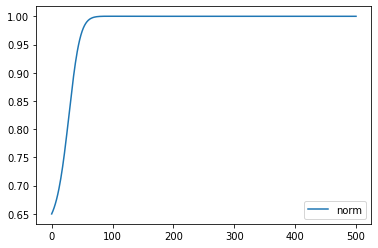

In [8]:
norm = np.sum(np.square(X), axis=1)
plt.plot(np.arange(iters + 1), norm, label="norm")
plt.legend()
plt.show()